In [2]:
#import simulation paths from ../PickleFiles/SimulationInfo.pickle
import pickle
import numpy as np


import pandas as pd




In [17]:


with open('merger_ratios.pickle', 'rb') as f:
    merger_ratios = pickle.load(f)
    

#print(merger_ratios)

# get all unique 'snap' values in the dictionary
snaps = []
times = []
for sim in merger_ratios.keys():
    for halo in merger_ratios[sim].keys():
        snaps.extend(merger_ratios[sim][halo]['snap'])
        times.extend(merger_ratios[sim][halo]['time'])

#remove duplicates
snaps = list(set(snaps))
times = list(set(times))
#remove values that are close in times
times = np.array(times)
times = np.round(times,2)
times = list(set(times))

#sort snaps descending
snaps = sorted(snaps,reverse=True)
times = sorted(times,reverse=True)
print(snaps,times)

['004096', '004032', '003968', '003936', '003840', '003744', '003712', '003648', '003552', '003456', '003360', '003328', '003264', '003195', '003168', '003072', '002976', '002944', '002880', '002816', '002784', '002688', '002592', '002496', '002432', '002400', '002304', '002208', '002176', '002112', '002088', '002048', '002016', '001920', '001824', '001792', '001728', '001664', '001632', '001536', '001440', '001408', '001344', '001280', '001269', '001248', '001152', '001056', '001024', '000974', '000960', '000864', '000768', '000672', '000640', '000480', '000456', '000384', '000347'] [13.73, 13.52, 13.37, 13.2, 12.94, 12.87, 12.55, 12.51, 12.23, 11.97, 11.91, 11.65, 11.59, 11.27, 11.21, 10.94, 10.77, 10.68, 10.62, 10.35, 10.3, 10.03, 9.98, 9.92, 9.71, 9.66, 9.49, 9.38, 9.34, 9.06, 9.02, 8.69, 8.37, 8.2, 8.16, 8.09, 8.05, 7.77, 7.73, 7.44, 7.41, 7.3, 7.09, 7.04, 6.87, 6.76, 6.44, 6.12, 6.01, 5.8, 5.58, 5.5, 5.16, 4.86, 4.83, 4.75, 4.51, 4.3, 4.28, 4.19, 3.89, 3.87, 3.55, 3.46, 3.29, 3.2

In [ ]:
#print(merger_ratios['cptmarvel'])
#find the most mergers over all snapshots by computing the length of the 'ratio' key in the dictionary
total_mergers = {}
for sim in merger_ratios.keys():
    total_mergers[sim] = {}
    for halo in merger_ratios[sim].keys():
        ratios = np.array(merger_ratios[sim][halo]['ratio'])
        #if size is not zero, find the maximum size of merger
        if ratios.size != 0:            
            merger_n = np.max(ratios)
        else:
            merger_n = 0
        #len(merger_ratios[sim][halo]['ratio'])
        total_mergers[sim][halo] = merger_n
        
#conver to dataframe
total_mergers = pd.DataFrame(total_mergers).T
# find sim and halo with most mergers
max_mergers = total_mergers.max().max()
#print(max_mergers)

#print(total_mergers)
#print(merger_ratios['storm'][4]['ratio'])



In [4]:
total_mergers
#print(merger_ratios['cptmarvel'][hid]['grps'])

,1,2,3,5,6,7,10,11,13,4,...,34,38,65,114,18,22,49,29,115,117
cptmarvel,0.018804,0.114655,0.148014,0.041783,0.000000,0.000000,0.000000,0.000000,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
elektra,0.086615,0.090067,0.178100,0.638606,NaN,NaN,0.000000,NaN,NaN,0.201873,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
storm,0.304176,0.256239,0.073712,0.000000,0.178569,0.000000,0.216030,0.000000,NaN,0.226337,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rogue,0.133053,NaN,0.312427,NaN,NaN,0.170034,0.145087,0.000000,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
h148,NaN,0.217772,0.150075,NaN,0.081952,0.000000,NaN,0.848823,0.0,0.025119,...,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
h229,NaN,0.038964,0.000000,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,0.003765,0.0,NaN,NaN,NaN
h242,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
h329,NaN,NaN,NaN,NaN,NaN,0.238616,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.154803,0.0,0.0


In [10]:



#define a function that finds simualtions and halos that have had a merger in the last 2 snapshots. 4096 and 4032 are the numbers of the last 2 snapshots

def find_mergers(merger_ratios, snapshots=['004096','004032','003968']):
    # Create an empty list to store the rows
    rows = []

    # Iterate over the merger_ratios
    for sim in merger_ratios.keys():
        for halo in merger_ratios[sim].keys():
            # Create a new row
            new_row = {'sim': sim, 'halo': halo, snapshots[0]: np.nan, snapshots[1]: np.nan,}

            # Check if a merger is found in the snapshots
            snaps = merger_ratios[sim][halo]['snap']
            ratios = merger_ratios[sim][halo]['ratio']

            for snap,ratio in zip(snapshots,ratios):
                if snap in snaps:
                    # If a merger is found, update the corresponding value in the new row
                    new_row[snap] = ratio

            # Append the new row to the list
            rows.append(new_row)
    # Create a DataFrame from the list of rows
    df = pd.DataFrame(rows)

    return df

                    


    # for sim in merger_ratios.keys():
    #     for halo in merger_ratios[sim].keys():
    #         #print(merger_ratios[sim][halo])
    #         #look for snaphsots in entry 'snap'
    #         snaps = merger_ratios[sim][halo]['snap']
    #         #print(snaps)
    #         for snap in snapshots:
    #             if snap in snaps:
    #                 print(f"Snapshot {snap} found in snaps for simulation {sim}, halo {halo}")
    #                 df.loc[(sim,halo),snap] = True    
            
            
                                
                #mergers.append((sim,halo))
        #return mergers
    return df
    
mergers = find_mergers(merger_ratios)
#print(mergers)

#print non nan values in dataframe
#print(mergers.loc[~mergers['004096'].isna()])
#print(mergers.loc[~mergers['004032'].isna()])

#print 'cptmarvel' halo 10 in dataframe
# test_merger = mergers.loc[(mergers['sim'] == 'cptmarvel') & (mergers['halo'] == 10)]
# print(test_merger[['004096','004032']].values)
# print(np.array([[np.nan, np.nan]]))
#print snap values in test_merger
#print(mergers[['004096','004032']].values)


#save dataframe to pickle in ../../Data/BasicData/Mergers.BWMDC.pickle
#mergers.to_pickle('../../Data/BasicData/Mergers.BWMDC.pickle')
#mergers.to_pickle('../../Data/BasicData/Mergers.MerianCDM.pickle')


In [20]:
mergers


,sim,halo,004096,004032,003968
0,cptmarvel,1,NaN,NaN,NaN
1,cptmarvel,2,NaN,NaN,NaN
2,cptmarvel,3,NaN,NaN,NaN
3,cptmarvel,5,NaN,NaN,NaN
4,cptmarvel,6,NaN,NaN,NaN
...,...,...,...,...,...
73,h242,34,NaN,NaN,NaN
74,h329,7,NaN,NaN,NaN
75,h329,29,NaN,NaN,NaN
76,h329,115,NaN,NaN,NaN


In [ ]:
sim = 'cptmarvel'
hid = 10
merger = []
merger_row = mergers.loc[(mergers['sim'] == sim ) & (mergers['halo'] == hid)]
merger.append(merger_row[['004096','004032']])
print(merger)

In [1]:
import os
os.environ['TANGOS_DB_CONNECTION'] = '/home/bk639/data_base/Merians_test.db'
#os.environ['TANGOS_DB_CONNECTION'] = '/data/REPOSITORY/public_data/rogue.cosmo25cmb.4096g5HbwK1BH.db'

#load tangos database

#make sure to only load tangos after setting environment variable otherwise it will see nothing
import tangos
#once  tangos is loaded force a reload 
import importlib
importlib.reload(tangos)

#export TANGOS_DB_CONNECTION=/home/bk639/Merians_db/tangos_data.db
# set the environment variable

tangos.all_simulations()

[<Simulation("r1023.romulus25.3072g1HsbBH")>,
 <Simulation("r431.romulus25.3072g1HsbBH")>,
 <Simulation("r442.romulus25.3072g1HsbBH")>,
 <Simulation("r468.romulus25.3072g1HsbBH")>,
 <Simulation("r488.romulus25.3072g1HsbBH")>,
 <Simulation("r489.romulus25.3072g1HsbBH")>,
 <Simulation("r492.romulus25.3072g1HsbBH")>,
 <Simulation("r502.romulus25.3072g1HsbBH")>,
 <Simulation("r515.romulus25.3072g1HsbBH")>,
 <Simulation("r523.romulus25.3072g1HsbBH")>,
 <Simulation("r544.romulus25.3072g1HsbBH")>,
 <Simulation("r552.romulus25.3072g1HsbBH")>,
 <Simulation("r555.romulus25.3072g1HsbBH")>,
 <Simulation("r556.romulus25.3072g1HsbBH")>,
 <Simulation("r568.romulus25.3072g1HsbBH")>,
 <Simulation("r569.romulus25.3072g1HsbBH")>,
 <Simulation("r571.romulus25.3072g1HsbBH")>,
 <Simulation("r597.romulus25.3072g1HsbBH")>,
 <Simulation("r613.romulus25.3072g1HsbBH")>,
 <Simulation("r614.romulus25.3072g1HsbBH")>,
 <Simulation("r615.romulus25.3072g1HsbBH")>,
 <Simulation("r618.romulus25.3072g1HsbBH")>,
 <Simulat

In [3]:
sim = tangos.get_simulation("rogue.cosmo25cmb.4096g5HbwK1BH")
timesteps = sim.timesteps
halos = timesteps[5].halos
print(halos[1].keys())

['lambda', 'lambda_gas', 'lambda_star', 'Rvir']


In [9]:
print(halos[1].keys())

['lambda', 'lambda_gas', 'lambda_star', 'Rvir']


/tmp/ipykernel_595430/990307731.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


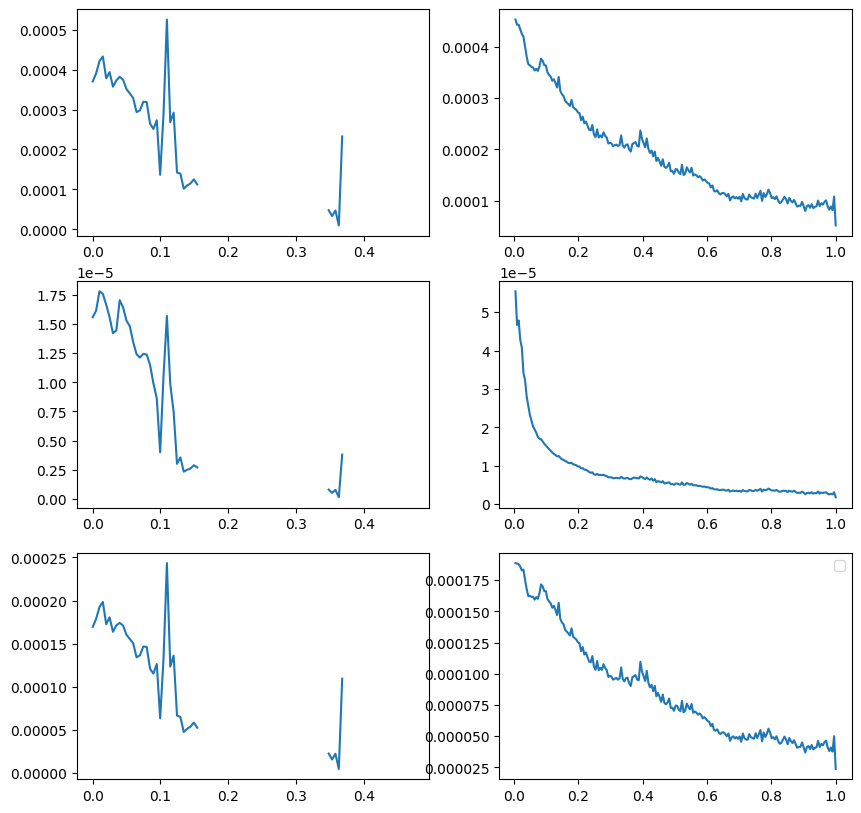

In [27]:
metal_profiles = ['star_metal_profile', 'gas_metal_profile', 'star_Fe_profile', 'gas_Fe_profile', 'star_Ox_profile', 'gas_Ox_profile']
star_metal_profile = halos[1]['star_metal_profile']
units = star_metal_profile.units
#creat x array from 0 to 1 with length of star_metal_profile
import numpy as np
import matplotlib.pyplot as plt
fig, axes = plt.subplots(3,2,figsize=(10,10))

x = np.linspace(0,1,len(star_metal_profile))
for profile,ax in zip(metal_profiles,axes.flatten()):
    profile = halos[1][profile]
    ax.plot(x,profile,label=profile.name)
    
plt.legend()
    
import pynbody

In [23]:
halos[1]['gas_metal_profile']

SimArray([           nan, 4.53042864e-04, 4.42884598e-04, 4.43030562e-04,
          4.33751930e-04, 4.25203963e-04, 4.19513160e-04, 4.00095344e-04,
          3.80750240e-04, 3.66221121e-04, 3.63804876e-04, 3.60856861e-04,
          3.59521437e-04, 3.53733386e-04, 3.57057764e-04, 3.52962831e-04,
          3.62201250e-04, 3.76646901e-04, 3.72587154e-04, 3.64170365e-04,
          3.63539111e-04, 3.49823565e-04, 3.45339943e-04, 3.41520359e-04,
          3.33788950e-04, 3.36571434e-04, 3.29283111e-04, 3.20512101e-04,
          3.41151681e-04, 3.13811015e-04, 3.07421478e-04, 3.04143225e-04,
          2.94549267e-04, 2.91432848e-04, 2.88202562e-04, 2.84429716e-04,
          2.96608112e-04, 2.82165780e-04, 2.79725068e-04, 2.77087885e-04,
          2.72116088e-04, 2.70417298e-04, 2.56787205e-04, 2.63655994e-04,
          2.50665286e-04, 2.54109814e-04, 2.46421462e-04, 2.38167950e-04,
          2.36911254e-04, 2.47465203e-04, 2.29115201e-04, 2.23682210e-04,
          2.38828851e-04, 2.22958708e-

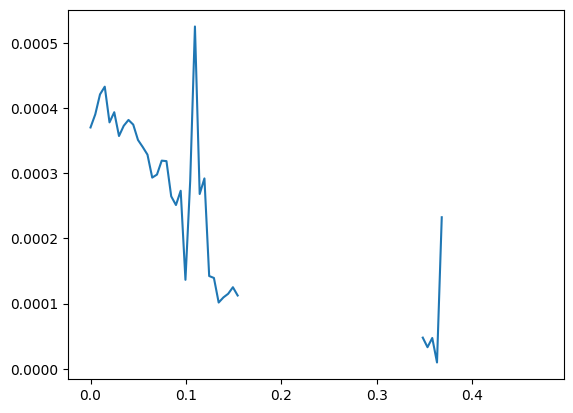

In [22]:

plt.plot(x,star_metal_profile)

In [2]:
#r431 = tangos.get_simulation("r431.romulus25.3072g1HsbBH")
r615 = tangos.get_simulation("r615.romulus25.3072g1HsbBH")
times = (r615.timesteps[0].time_gyr_cascade)
redshifts = (r615.timesteps[0].redshift_cascade)
#np.diff(redshifts)



In [3]:
from tangos.query import get_timestep
# get time t from timesteps
timesteps = r615.timesteps
timestep = r615.timesteps[-1]
#print(timestep.time_gyr_cascade)
#print(timestep.keys)

redshfits_reverses = redshifts[::-1]


#print(r615.timesteps[-1].halos[0])
h = r615.timesteps[-1].halos[0]
print(h)

#halo = tangos.get_halo('r615.romulus25.3072g1HsbBH//home/bk639/tangos_testing/r615.romulus25.3072g1HsbBH/r615.romulus25.3072g1HsbBH.000288/ahf_200/halo_1')
halo = h
#halo.keys()
#print(halo)

<Halo 'r615.romulus25.3072g1HsbBH/r615.romulus25.3072g1HsbBH.004096/r615.romulus25.3072g1HsbBH.004096/halo_1' | NDM=8981303 Nstar=4468255 Ngas=5762332>


In [1]:
# import tangos.relation_finding.tree.MergerTree
from tangos.relation_finding.tree import MergerTree
import matplotlib.pyplot as plt
import numpy as np
import tangos # Adjust this import as needed

def plot_limited_merger_trees(max_redshifts=13, size_scale=1, figsize=(8, 8)):
    
    #only plot sims with the following basenames
    basenames = ['r613.romulus25.3072g1HsbBH', 'r615.romulus25.3072g1HsbBH', 'r761.romulus25.3072g1HsbBH','r918.romulus25.3072g1HsbBH']
    sims = [tangos.get_simulation(basename) for basename in basenames]
    #sims = tangos.all_simulations()
    
    #sims = sims[]
    n = len(sims)
    fontsize = 20
    
    # Calculate the number of rows and columns
    n_cols = min(n, 8)  # Limit to 5 columns max
    n_rows = int(np.ceil(n / n_cols))
    
    # Create figure and axes
    fig, axs = plt.subplots(n_rows, n_cols, figsize=figsize, squeeze=False)
    axs = axs.flatten()
    redshifts = sims[0].timesteps[0].redshift_cascade[::-1][:max_redshifts]
    redshifts = [round(z, 2) for z in redshifts]
    yticks = np.arange(0, 5 * max_redshifts, 5)

    for i, sim in enumerate(sims):
        ax = axs[i]
        ax.set_aspect('equal')
        #if sim = r1023 use halo 2
        #for sim r707 use halo 2    
        # for sim r968 use halo 3
        if sim.basename == 'r1023.romulus25.3072g1HsbBH':
            halo = sim.timesteps[-1].halos[2]
        elif sim.basename == 'r707.romulus25.3072g1HsbBH':
            halo = sim.timesteps[-1].halos[2]
        elif sim.basename == 'r968.romulus25.3072g1HsbBH':
            halo = sim.timesteps[-1].halos[3]
        else:            
            halo = sim.timesteps[-1].halos[1]
        tree = MergerTree(halo)
        tree.construct()

        def plot_tree_limited(node, depth=0):
            if depth >= max_redshifts:
                return

            y = depth * tree.x_step
            x = node['_x']
            scaled_size = node['size'] * size_scale

            circ = plt.Circle((x, y), scaled_size, facecolor='black', edgecolor='none')
            ax.add_patch(circ)
            
            for child_node in node['contents']:
                child_depth = depth + 1
                if child_depth < max_redshifts:
                    ax.plot([x, child_node['_x']], [y, y + tree.x_step], 'k', linewidth=0.5)
                plot_tree_limited(child_node, child_depth)

        plot_tree_limited(tree._treedata)
        
        ax.set_ylim(-5, tree.x_step * max_redshifts)
        #get current xlim, and make sure the minimum xrange is greater than 5
        xlim = ax.get_xlim()
        if xlim[1] - xlim[0] < 5:
            ax.set_xlim(xlim[0] - 2.5, xlim[1] + 2.5)

        #add vertical lines at redshifts
        for z in range(1, max_redshifts):
            ax.axhline(z * tree.x_step, color='gray', linestyle='--', linewidth=0.5,alpha=0.5)
        #remove plot borders
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.set_xticks([])
        

        ax.set_yticks(yticks)
        ax.set_yticklabels(redshifts, fontsize=fontsize)
        ax.set_xticks([])
        name = sim.basename.split('.')[0]
        
        ax.set_title(f'Sim {name}', fontsize=fontsize)
        
        if i % n_cols == 0:  # Only for leftmost plots
            ax.set_ylabel('Redshift', fontsize=fontsize)

    # Remove any unused subplots
    for j in range(i+1, len(axs)):
        fig.delaxes(axs[j])

    plt.tight_layout()
    plt.savefig('merger_trees.png', dpi=150, bbox_inches='tight')
    plt.show()

# Usage
plot_limited_merger_trees()

RuntimeError: No simulation matches 'r613.romulus25.3072g1HsbBH'

In [ ]:
# for r613, r615, r761, r918
# plot c/a and b/a vs redshift for the last 10 snapshots

#get b/a and c/a for the last 10 snapshots using pynbody.analysis.halo.shape

sims = ['r613.romulus25.3072g1HsbBH', 'r615.romulus25.3072g1HsbBH', 'r761.romulus25.3072g1HsbBH','r918.romulus25.3072g1HsbBH']

for sim in sims:
    sim = tangos.get_simulation(sim)
    timesteps = sim.timesteps
    for ts in timesteps[-10:]:
        print(ts)
        halos = ts.halos
        for halo in halos:
            print(halo)
            #get shape of halo
             = pynbody.analysis.halo.shape(halo)

            print(ba,ca)



In [ ]:

ts = r615.timesteps[-1]
snap = ts.extension.split('.')[-1].split('/')[0]
print(len(r615.timesteps))

In [8]:
from tangos.examples.mergers import get_mergers_of_major_progenitor, most_major_mergers_since

In [6]:
r615 = tangos.get_simulation("r615.romulus25.3072g1HsbBH")
print(r615.timesteps[-2].extension)
for i in range(10):
    halo = r615.timesteps[-2].halos[i].basename
    print(halo)

r615.romulus25.3072g1HsbBH.004032/r615.romulus25.3072g1HsbBH.004032
halo_1
halo_2
halo_3
halo_4
halo_5
halo_6
halo_7
halo_8
halo_9
halo_10


SELECT haloproperties.id AS haloproperties_id, haloproperties.halo_id AS haloproperties_halo_id, haloproperties.data_float AS haloproperties_data_float, haloproperties.data_int AS haloproperties_data_int, haloproperties.name_id AS haloproperties_name_id, haloproperties.deprecated AS haloproperties_deprecated, haloproperties.creator_id AS haloproperties_creator_id 
FROM haloproperties 
WHERE haloproperties.halo_id = ? AND haloproperties.deprecated = 0 ORDER BY haloproperties.id

In [24]:


merger_ratios = get_mergers_of_major_progenitor(r615.timesteps[-1].halos[1])
print(merger_ratios[0])
print(merger_ratios[1])



[2.65163447e-11 1.50915421e-02 3.83686212e-02 8.74040118e-02
 1.13270555e-01 8.60667989e-01 9.31622609e-01 1.00864462e+00
 1.09267615e+00 1.28667131e+00 1.52680096e+00 2.02529184e+00
 2.51840040e+00 3.81667842e+00 3.81667842e+00 3.81667842e+00
 4.58380161e+00 5.74864248e+00 5.74864248e+00 5.74864248e+00
 5.74864248e+00 5.74864248e+00 5.74864248e+00 7.79574739e+00
 7.79574739e+00]
[ 1.85426311  2.5220598   2.63897145  4.62886749  6.68171683  7.51727163
  6.59213284  6.59461349  6.43350859  5.6185824  55.25197997 16.16954809
 37.82851622  4.71586535 11.38406653 23.64821924 14.594931    1.00344652
  5.06894846  4.38528027  5.88244748 11.7554485   9.27624909  2.58457281
  5.22883135]


In [46]:
#define a function that returns the largest merger ratio for each halo in a given timestep

import mergers as mg
import importlib
importlib.reload(mergers)

sims = tangos.all_simulations()
merger_ratios = {}
for sim in sims:
    #sim = tangos.get_simulation("r431.romulus25.3072g1HsbBH")
    print(sim.basename)
    name = sim.basename.split('.')[0]
    #print(name)
    sim_dict = mg.largest_merger_ratios(sim)
    if sim_dict is not None:
        merger_ratios[name] = sim_dict
   # break
#print which sims have a merger in the last 2 snapshots, 'snap' = ['004096', '004032']



r1023.romulus25.3072g1HsbBH
Redshifts: 1.5268, 1.5268
Redshifts: 1.8348, 1.8348
Redshifts: 2.0253, 2.0253
Redshifts: 5.9897, 5.9897
Redshifts: 5.9897, 5.9897
19 19 19
Redshift: 1.5268009638019295, Ratio: 18.19214885620157
Redshift: 1.8348024101643006, Ratio: 5.90282449831806
Redshift: 2.0252918362063896, Ratio: 1.6087627172707322
Redshift: 2.0252918362063896, Ratio: 24.099201255170446
Redshift: 2.0252918362063896, Ratio: 25.89020839718051
Redshift: 2.2494992402857314, Ratio: 15.983310856372219
Redshift: 2.848559732213341, Ratio: 8.26144263612618
Redshift: 2.848559732213341, Ratio: 41.35707101186884
Redshift: 2.848559732213341, Ratio: 75.5553105475928
Redshift: 2.9972897266728467, Ratio: 10.087426431246657
Redshift: 2.9972897266728467, Ratio: 5.606625628215422
Redshift: 3.8166784197434636, Ratio: 59.81195566112431
Redshift: 3.9979920076436946, Ratio: 2.0066777041942605
Redshift: 3.9979920076436946, Ratio: 5.926330372422785
Redshift: 4.583801606437492, Ratio: 61.745807590467784
Redshift:

In [56]:
#print(merger_ratios['r615'][1])
#     
# print(merger_ratios['r615'][1]['ratio'])
# print(merger_ratios['r615'][1]['snap'])
# print(merger_ratios['r615'][1]['redshift'])
#merger_ratios = mergers.largest_merger_ratios(r615)
#print(merger_ratios)

print(merger_ratios)

{}


In [45]:
import mergers
import importlib
#display functions in mergers
print(dir(mergers))

['__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', 'calculate_total_merger_ratio', 'get_grps', 'get_merger_dict', 'get_mergers_of_major_progenitor', 'largest_merger_ratios', 'np', 'tangos']


In [24]:
halo = r615.timesteps[-1].halos[1]



%matplotlib inline
import pylab as p

import tangos


p.imshow(halo['uvi_image'])



KeyError: 'uvi_image'

In [76]:

redshifts = np.array([5.74864248, 5.74864248, 5.74864248,7,7,7])
times = np.array([1,1,1,2,2,2])
snaps = ['001280','001280','001280','001152','001152','001152']

ratios = np.array([0.9709186 , 4.50464279, 7.92102632,2,5,3])
#for each unique redshift, find the maximum merger ratio and add redshift and merger ratio to a dictionary
merger_dict = get_merger_dict(redshifts,ratios,snaps,times)
print(merger_dict)



{'redshift': [5.74864248, 7.0], 'merger_ratio': [7.92102632, 5.0], 'time': [1, 2], 'snap': ['001280', '001152']}


In [120]:
#merger_ratios = most_major_mergers_since(ts, Mvir_min=0.8e12, Mvir_max=2e12, z_merger_max=12, no_merger_value=None)
mergers = get_mergers_of_major_progenitor(r615.timesteps[-1].halos[1])
print(mergers[2][0][1])



397246


In [ ]:
def get_major_minor_mergers(mergers,threshold = 1/5):
    #return a mask for major and minor mergers
    # arrays with shape (46,1,2)
    major_mask = []
    minor_mask = []
    for merger in mergers:
    # check for minor or major mergers in either column of mergers
    #if a major merger is found, it should overwrite a minor merger
    #only print if one value is not nans


        if merger[0][0] <= threshold or merger[0][1] <= threshold: #check minor
            major=(False)
            minor=(True)
        elif merger[0][0] >= threshold or merger[0][1] >= threshold: #check major
            major=(True)
            minor=(False)
        else:
            major=(False)
            minor=(False)
        if not np.isnan(merger[0][0]) or not np.isnan(merger[0][1]):
            print(f'Merger ratios: {merger[0][0]:.2f}, {merger[0][1]:.2f}')
            print(f'Major: {major}, Minor: {minor}')
        major_mask.append(major)
        minor_mask.append(minor)

    return major_mask,minor_mask

In [ ]:
import numpy as np
#create nx1x2 array of np.nans
n = 5
array = np.ones((n,1,2))*np.nan

# amke some values 1 or.1
array[0][0][0] = 1
array[0][0][1] = .1
array[2][0][0] = .1
array[3][0][0] = 1
#print(array)
print(array.shape)

major_mask,minor_mask=get_major_minor_mergers(array)
#print(major_mask)


In [ ]:
def calculate_total_merger_ratio(merger_ratios):
    """
    Calculate the total ratio Ma/M_total given a list of merger ratios Ma/Mi.
    
    :param merger_ratios: List of merger ratios (Ma/Mi) where Mi is always the smaller galaxy
    :return: The total ratio Ma/M_total
    """
    # Calculate Ma (assuming Mi = 1 for each merger)
    Ma = 1
    M_total = Ma + sum(1/(merger_ratios))
    total_ratio = Ma / M_total
    return total_ratio

# Example usage

# Example list of merger ratios
example_ratios = np.array((2,2))

total_ratio = calculate_total_merger_ratio(example_ratios)
print(f"Given merger ratios: {example_ratios}")
print(f"Total ratio Ma/M_total: {total_ratio:.4f}")

In [53]:
import numpy as np
import tangos
from tangos.examples.mergers import get_mergers_of_major_progenitor

def calculate_total_merger_ratio(merger_ratios):
    """
    Calculate the total ratio Ma/M_total given a list of merger ratios Ma/Mi.

    :param merger_ratios: List of merger ratios (Ma/Mi) where Mi is always the smaller galaxy
    :return: The total ratio Ma/M_total
    """
    # Calculate Ma (assuming Mi = 1 for each merger)
    merger_ratios = np.array(merger_ratios)
    # all mergers should be greater than 1, but if not, we simply invert the value
    merger_ratios[merger_ratios < 1] = 1 / merger_ratios[merger_ratios < 1]

    Ma = 1
    M_total = Ma + sum(1 / (merger_ratios))
    total_ratio = Ma / M_total
    return 1- total_ratio



def get_merger_dict(redshifts, ratios, snaps, times):
    merger_dict = {'redshift': [], 'ratio': [], 'time': [], 'snap': []}
    for redshift, ratio, time, snap in zip(redshifts, ratios, times, snaps):

        if redshift not in merger_dict['redshift']:
            merger_ratios = []
            merger_dict['redshift'].append(redshift)
            i = merger_dict['redshift'].index(redshift)
            merger_dict['ratio'].append('')
            merger_ratios.append(ratio)
            merger_dict['time'].append(time)
            merger_dict['snap'].append(snap)
        else:
            merger_ratios.append(ratio)

        #add total ratio once for each redshfit to the dictionary

        merger_dict['ratio'][i] = calculate_total_merger_ratio(merger_ratios)

            # if ratio > merger_dict['ratio'][i]:
            #     merger_dict['ratio'][i] = ratio

    return merger_dict




def largest_merger_ratios(sim):
    # recreate this kind of dict {1: {'ratio': [0.018803793185661853], 'time': [4.298635569270686], 'snap': ['001280'], 'grps': [SimArray([ 1, 53])]}, 2: {'ratio': [0.11465486785842333, 0.08268792674930038], 'time': [3.869872473372461, 4.298635569270686], 'snap': ['001152', '001280'], 'grps': [SimArray([ 2, 14]), SimArray([ 2, 17])]}, 3: {'ratio': [0.09404809180521696, 0.14801435041365774, 0.030147238179703544, 0.03172785482936007, 0.017176853819010903, 0.018749636316129668, 0.010836041713394936], 'time': [5.584924856992905, 6.013687952908708, 6.87121414472478, 7.299977240632852, 7.728740336534077, 8.157503432432808, 10.301318911979886], 'snap': ['001664', '001792', '002048', '002176', '002304', '002432', '003072'], 'grps': [SimArray([ 3, 18]), SimArray([ 3, 14]), SimArray([ 3, 29]), SimArray([ 3, 49]), SimArray([ 3, 80]), SimArray([ 3, 75]), SimArray([ 4, 93])]}, 5: {'ratio': [0.04178299208546208], 'time': [2.5835831856697413], 'snap': ['000768'], 'grps': [SimArray([ 2, 37])]}, 6: {'ratio': [], 'time': [], 'snap': [], 'grps': []}, 7: {'ratio': [], 'time': [], 'snap': [], 'grps': []}, 10: {'ratio': [], 'time': [], 'snap': [], 'grps': []}, 11: {'ratio': [], 'time': [], 'snap': [], 'grps': []}, 13: {'ratio': [], 'time': [], 'snap': [], 'grps': []}}

    # get arrays for ratios, times, snaps, and grps for each halo
    merger_ratios = {}
    timesteps = sim.timesteps
    # create an array holding snaps, times, and redshifts for each timestep
    # size of array is number of timesteps by 3
    snaps = []

    for ts in timesteps:
        snap = ts.extension.split('.')[-1].split('/')[0]
        snaps.append(snap)
    #snaps = snaps[::-1]

    times_all = timesteps[0].time_gyr_cascade
    redshifts_all = timesteps[0].redshift_cascade


    #print('Only processing halo 1')
    halo = sim.timesteps[-1].halos[1]
    redshifts, ratios, halos = get_mergers_of_major_progenitor(halo)
    print(ratios)

    #remove index of times_all and snaps that are not in redshifts
    #redshifts_all has all redshifts, but redshifts only has the redshifts of the mergers
    #so we need to remove the indices of the redshifts that are not in redshifts_all

    #get indices of redshifts that are in redshifts_all
    indices = [redshifts_all.index(redshift) for redshift in redshifts]
    times = [times_all[i] for i in indices]
    snaps = [snaps[i] for i in indices]
    redshift_check = [redshifts_all[i] for i in indices]
    #check if redshift is the same as redshift_check

    #for i in [0, 1, 2,-2, -1]:
    #    print(f'Redshifts: {redshifts[i]:.4f}, {redshift_check[i]:.4f}')


    #print(len(redshifts), len(snaps), len(times))
    #for redshift, ratio, h in zip(redshifts[0:i], ratios[0:i], halos[0:i]):
    #    print(f"Redshift: {redshift}, Ratio: {ratio}")
        #at some point maybe add grps to the dictionary
    # get ratios for each redshift and store in an array
    if len(redshifts)>0:
        sim_dict ={1: get_merger_dict(redshifts, ratios, snaps, times)}
    else:
        return

    return sim_dict


def get_grps(halos):
    #halos is a list of tangos halo objects, the function returns a list of the halo numbers from the mergers
    grps = []


In [70]:
from tangos.input_handlers import get_named_handler_class
#from tangos.input_handlers.pynbody import ChangaInputHandler
handler = 'pynbody.PynbodyInputHandler'
output_class = get_named_handler_class(handler)

In [71]:
print(output_class)

<class 'tangos.input_handlers.pynbody.PynbodyInputHandler'>


In [74]:
from pynbody import halo
#get possible halo classes
print(dir(halo))

['AHFCatalogue', 'AdaptaHOPCatalogue', 'AmigaGrpCatalogue', 'ArepoSubfindHDFCatalogue', 'DummyHalo', 'Gadget4SubfindHDFCatalogue', 'GrpCatalogue', 'HOPCatalogue', 'Halo', 'HaloCatalogue', 'NewAdaptaHOPCatalogue', 'RockstarCatalogue', 'RockstarIntermediateCatalogue', 'SubFindHDFHaloCatalogue', 'SubfindCatalogue', 'TNGSubfindHDFCatalogue', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_get_halo_classes', 'adaptahop', 'ahf', 'copy', 'hop', 'legacy', 'logger', 'logging', 'np', 'pynbody', 'rockstar', 'snapshot', 'subfind', 'subfindhdf', 'util', 'warnings', 'weakref']
